# Variational Auto Encoders (VAE)

Ce document présente les Variational Auto Encoders (VAE) et donne quelques exemples illustratifs.
Les VAEs ayant déjà été abordés en SDD lors du cours de réduction de dimension, ce notebook fera un rapide rappel sur ce qui a été vu et tentera d'aller plus loin. L'objectif final est de permettre de créer soi-même son propre VAE. 

Plusieurs articles ont été utilisés pour faire ce notebook :
- https://arxiv.org/pdf/1606.05908.pdf (article de référence)
- https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73
- https://www.geeksforgeeks.org/variational-autoencoders/
- https://www.jeremyjordan.me/variational-autoencoders/
- https://en.wikipedia.org/wiki/Autoencoder

## I. Introduction sur les autoencoders

### A. Rappels du cours

Lorsqu'on doit étudier des systèmes complexes, il peut être intéressant de réduire la dimension du problème, pour ensuite si besoin revenir aux dimensions de base du problème. On peut par exemple utiliser une approche linéaire avec une PCA (Analyse par Composantes Principales) mais les problèmes non linéaires ne sont pas gérés.

Un réseau de neurone peut alors être utilisé : il supporte les relations non linéaires et gère de hautes dimensions.

Un autoencoder est un réseau de neurone dans lequel on va encoder les informations de l'input x dans une autre forme z, généralement de dimension inférieure à x. z peut être vu comme une représentation compressée de x puisqu'il doit conserver un maximum d'information représentative de x, les données devant après être retransformées à l'aide d'un decoder. Cet output x' doit ressembler le plus possible à x pour que l'autoencoder soit de qualité. L'autoencoder est donc un modèle d'apprentissage non supervisé.

![Représentation d'un autoencoder](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn-images-1.medium.com%2Fmax%2F1600%2F1*44eDEuZBEsmG_TCAKRI3Kw%402x.png&f=1&nofb=1)

Un autoencoder peut avoir plusieurs couches cachées dans l'encoder et le decoder. Lorsqu'il n'y a qu'une couche et aucune fonction d'activation, on se retrouve à faire un équivalent d'une PCA. Une différence avec la PCA est que les axes principaux obtenus avec l'autoencoder ne sont pas forcément orthogonaux, contrairement à ceux de la PCA. Il est aussi à noter que la première composante d'un tel autoencoder n'est pas forcément celle qui explique la plus grande partie de la variance.


![Comparaison avec la PCA](https://miro.medium.com/max/1250/1*ek9ZFmimq9Sr1sG5Z0jXfQ@2x.png)



### B. Un peu de maths derrière tout ça

Plus formellement, on dit que l'input x est dans un ensemble X. Le code z (ou h dans certains articles) est dans un ensemble F, différent de X. Enfin, l'output x' est dans le même ensemble que x, c'est-à-dire X. L'encoder, que l'on note ϕ : X &rarr; F, et le decoder, que l'on note ψ : F &rarr; X, sont les deux parties principales de l'autoencoder. On a donc z=ϕ(x) et x'=ψ(z) et on cherche à minimiser |x - ψ o ϕ(x)|<sup>2</sup>. z est alors appelé *code*, *latent variable* ou *latent representation*. 

Dans le cas le plus simple (une couche), l'encoder est représenté par z=σ(Wx+b) où W est une matrice de poids, b un vecteur de biais et σ une fonction d'activation de réseau de neurone. Au départ, W et b sont intialisés au hasard puis sont ensuite entrainés et modifiés via un algorithme de backpropagation. 

Ensuite, le decoder cherche à reconstruire x le plus fidèlement possible à partir de z : x'=σ'(W'z+b') où W', b' et σ' ne sont pas forcément liés à W, b et σ de l'encoder.

La fonction loss est donc L(x, x') = |x - σ'(W' (σ(Wx+b)) + b')|<sup>2</sup>.

On peut remarquer que plus l'architecture est complexe, par exemple avec de nombreuses couches non linéaires, plus la perte L sera faible et z aura une petite dimension. Cependant, la structure serait de moins en moins compréhensible et demanderait énormément de ressources. De plus, on n'a pas vraiment de moyen de créer de nouveaux individus avec le modèle. En effet, pour créer de nouveaux individus, il faut une structure adaptée, sachant qu'elle dépend beaucoup de l'espace initial de données et de l'espace de z. Si par exemple on considère un autoencoder sans perte, il va y avoir de l'overfitting lors de l'entrainement qui se retrouvera dans une mauvaise génération d'individu. Ainsi, l'autoencoder classique n'est pas adapté pour la génération d'individus.

### C. Plusieurs types d'autoencoders

Il existe plusieurs types d'autoencoders qui seront très brièvement présentés dans cette partie.

#### Sparse autoencoders (SAE)

Pour cet autoencoder, z peut avoir une dimension supérieure à celle de x mais seulement un certain nombre vont s'activer ensemble. La fonction objectif L est donc modifiée en ajoutant une composante sur le nombre d'unités d'input utilisés. Cela va donc forcer à laisser quelques neurones inactifs. Cette méthode est principalement utilisée pour de la classification.

![SAE](https://miro.medium.com/max/3372/1*YoseSRJ0HssJor64ypBb6w.png)


#### Denoising autoencoders (DAE)

Cet autoencoder est utile lorsque l'entrée est partiellement corrompue ou bruitée. Il apprend alors à récupérer l'entrée débruitée. Pour entrainer le modèle d'un DAE, on corromp une entrée x en y à l'aide d'un mappage stochastique et on calcule ensuite la loss L(x, y') au lieu de L(y, y'). Un DAE peut aussi être entrainé en enlevant certaines parties de l'input.

![DAE](https://paperswithcode.com/media/methods/Denoising-Autoencoder_qm5AOQM.png)


#### Contractive autoencoder (CAE)
Un CAE permet d'être robuste à de petites variations de la donnée d'entrée, grace à un régularisateur explicite dans la fonction objectif L.


#### Variational autoencoder (VAE)
Le voilà enfin, l'autoencoder qu'on va étudier de beaucoup plus près. De manière très simplifiée, il s'agit d'un autoencoder qui décrit statistiquement les données dans l'espace F de z. Dans ce cas, z est une distribution de probabilité, une structure continue, régularisée au lieu d'une valeur. Cette méthode permet de générer de nouveaux individus, ce qu'un autoencoder classique serait quasiment incapable de faire.

![VAE](https://www.renom.jp/notebooks/tutorial/generative-model/VAE/fig4.png)

Finalement, les VAE n'ont pas grand chose à voir avec les autoencoders, hormis leur forme.

## II. Mieux comprendre les VAEs

### A. Intuition sur ce qu'est un VAE

Le but principal d'un VAE est donc de recontruire une image mais surtout de générer de nouveaux individus réalistes grace au modèle appris, en limitant au maximum l'overfitting. Le decoder doit donc être capable de générer des individus à l'aide d'un input de la forme de z.

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fresearch.aimultiple.com%2Fwp-content%2Fuploads%2F2020%2F07%2FVariation-encoder.png&f=1&nofb=1)

De manière très simple, il s'agit de modifier l'input x afin de déterminer la probabilité de z sachant x. Puis z est déterminé comme suivant la loi de p(z|x) et enfin le decoder en ressort x'.

Intuitivement, c'est comme si au lieu de donner à une caractéristique de x une valeur bien définie, on lui donne une loi de probabilité.

![Smile](https://www.jeremyjordan.me/content/images/2018/06/Screen-Shot-2018-06-20-at-2.46.16-PM.png)

Ainsi, intuitivement, un input x exprimé par z peut être vu comme un ensemble de distributions de probabilité.

![](https://www.jeremyjordan.me/content/images/2018/06/Screen-Shot-2018-06-20-at-2.47.56-PM.png)

On cherche donc une loi de probabilité p qui permet de passer de z à x. Cette loi permettrait de générer des individus à l'aide d'un autre z !
Finalement, l'encoder peut être vu comme p(z|x) et le decoder comme p(x|z).


### B. Mathématiques derrière

Pour calculer p(z|x), on a 
<div class="math">
\begin{equation}
    p(z|x) = \frac{p(x|z) p(z)}{p(x)}
\end{equation}
</div>

On doit donc calculer <div class="math">
\begin{equation}
    p(x)= \int p(x|z) p(z) dz
\end{equation}
</div>

En général, c'est impossible à obtenir. p(z|x) doit donc être approximé par une autre loi q(z|x). On doit donc aussi minimiser la différence entre ces deux distributions de probabilité, c'est-à-dire KL( q(z|x) || p(z|x) ) où KL est la [divergence de Kullback-Leibler](https://fr.wikipedia.org/wiki/Divergence_de_Kullback-Leibler). Cette expression mène à minimiser 

\begin{equation}
   E_{q(z|x)} log(p(x|z)) - KL(q(z|x) || p(x))
\end{equation}
</div>

Le premier terme représente la qualité de la reconstruction et le deuxième terme assure que q est similaire à la distribution p. La perte est donc L(x, x') + KL( q(z|x) || p(z|x) ).

Finalement, le VAE peut être vu comme l'image suivante :
![](https://www.jeremyjordan.me/content/images/2018/03/Screen-Shot-2018-03-17-at-11.31.15-PM.png)

Utiliser des distributions de probabilité n'est pas suffisant pour limiter l'overfitting. En effet, on pourrait imaginer un VAE qui utilise des distributions ressemblant fortement à des diracs. Dans ce cas, le VAE ressemblerait à un autoencoder classique, qui fait de l'overfitting. Pour limiter ces effets, la matrice de covariance et la moyenne des distributions doivent être régularisées. En général, les ditributions devront être proches de distributions normales centrées réduites.

![](https://miro.medium.com/max/1250/1*9ouOKh2w-b3NNOVx4Mw9bg@2x.png)

On peut d'ailleurs observer les mélanges de formes qui premettent de générer de nouveaux individus. Ce ne serait pas possible avec un autoencoder classique.

![](https://miro.medium.com/max/875/1*79AzftDm7WcQ9OfRH5Y-6g@2x.png)

L'erreur de reconstruction des input d'entrainement est donc plus importante et doit être contrebalancée avec la définition de la KL divergence.

Pour aller plus loin au niveau des mathématiques derrière les VAE, les articles cités en début de notebook sauront vous satisfaire !

Un bref schéma récapitulatif avant d'entrer dans la partie code est donc :

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Flilianweng.github.io%2Flil-log%2Fassets%2Fimages%2Fvae-gaussian.png&f=1&nofb=1)

## III. Implémentation de la théorie

### A. Implémentation du VAE vue en cours

Le but de  cette partie est de reprendre en main le VAE qui a été vu en cours à l'aide de keras.

On utilisera pour cela des données mnist sur des chiffres. Ils sont codés dans des array de 784 float. On peut ensuite les convertir en un carré de 28 par 28 où chaque float correspond à la valeur d'un pixel en gradient de blanc/noir.

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = np.array([x.flatten() for x in X_train]).astype("float32") / 255.
X_test = np.array([x.flatten() for x in X_test]).astype("float32") / 255.

nb_train = X_train[:, 0].size
nb_test = X_test[:, 0].size

dim_x = X_train[0].size #=784 = 28x28
dim_hidden_encoder = 200
dim_z = 10
dim_hidden_decoder = 200

nb_pixel = 28 # dim_x = nb_pixel x nb_pixel

nb_epoch = 30
batch_size = 128

On définit d'abord ce qui va être utilisé dans le *latent space* c'est-à-dire au niveau de z. On fait donc le passage d'une loi normale centrée réduite à une loi de moyenne et écart-types connus.

**Exercice :** compléter le code suivant

In [7]:
class Sampling(layers.Layer):

    def call(self, inputs):
        z_mean, log_z_std = inputs

        nbatch = K.shape(z_mean)[0]
        ndim = K.shape(z_mean)[1]

        # Redéfinir z à l'aide des inputs
        z = 0 

        return z

In [8]:
######## CORRECTION #########

class Sampling(layers.Layer):

    def call(self, inputs):
        z_mean, log_z_std = inputs

        nbatch = K.shape(z_mean)[0]
        ndim = K.shape(z_mean)[1]

        z_std = K.exp(log_z_std)
        z_normal = K.random_normal(shape=(nbatch,ndim), mean=0., stddev=0.1)

        z = z_mean + z_normal * z_std

        return z

On définit ensuite l'encoder et le decoder à l'aide de keras. Puis on les fusionne dans l'autoencoder auquel on définit une fonction loss.

In [9]:
# Encoder architecture
encoder_inputs = keras.Input(shape=(dim_x,))
hidden1 = layers.Dense(dim_hidden_encoder, activation="relu")(encoder_inputs)


z_mean = layers.Dense(dim_z)(hidden1)
log_z_std = layers.Dense(dim_z)(hidden1)

# Sampling
z = Sampling()([z_mean, log_z_std])

encoder = keras.Model(encoder_inputs, z, name="encoder")


# Decoder architecture
decoder_inputs = keras.Input(shape=(dim_z,))
decoder_hidden = layers.Dense(dim_hidden_decoder, activation="relu")(decoder_inputs)
decoder_outputs = layers.Dense(dim_x, activation="sigmoid")(decoder_hidden)

decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")


# Combining architectures
outputs = decoder(z)
vae = keras.Model(encoder_inputs, outputs, name="vae")



# Loss function definition
reconstruction_loss = keras.losses.binary_crossentropy(encoder_inputs, outputs) * dim_x

kl_loss = -0.5 * K.sum(1 + log_z_std - K.square(z_mean) - K.exp(log_z_std))
vae_loss = K.mean(reconstruction_loss + kl_loss)


# Compiling the model
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

On peut à présent entrainer le modèle !

Epoch 1/30
469/469 [==============================] - 6s 12ms/step - loss: 326.2090 - val_loss: 197.8459
Epoch 2/30
469/469 [==============================] - 6s 12ms/step - loss: 192.8643 - val_loss: 180.1448
Epoch 3/30
469/469 [==============================] - 5s 12ms/step - loss: 178.8463 - val_loss: 173.3256
Epoch 4/30
469/469 [==============================] - 5s 12ms/step - loss: 172.3150 - val_loss: 168.3753
Epoch 5/30
469/469 [==============================] - 6s 12ms/step - loss: 168.1091 - val_loss: 164.3848
Epoch 6/30
469/469 [==============================] - 5s 12ms/step - loss: 164.1046 - val_loss: 160.7070
Epoch 7/30
469/469 [==============================] - 5s 12ms/step - loss: 161.3042 - val_loss: 157.9698
Epoch 8/30
469/469 [==============================] - 5s 12ms/step - loss: 158.6286 - val_loss: 156.1711
Epoch 9/30
469/469 [==============================] - 5s 12ms/step - loss: 156.4993 - val_loss: 154.5883
Epoch 10/30
469/469 [==============================] - 

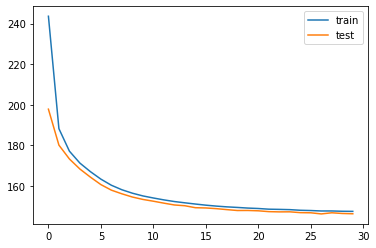

In [10]:
# Fitting the model
history = vae.fit(X_train, X_train,
          epochs=nb_epoch,
          batch_size=batch_size,
          shuffle=True,
          validation_data=(X_test, X_test))

# Visualizing the training and validation losses
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

Une fois le modèle entrainé, on peut regarder les résultats obtenus sur l'échantillon test. Est-ce que la sortie ressemble à l'entrée et est-ce qu'elle possède bien la plupart des caractéristiques principales de l'entrée ?

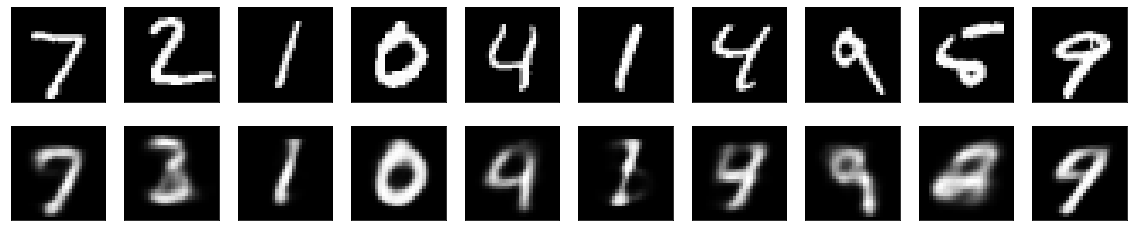

In [11]:
n = 10
plt.figure(figsize=(2*n, 4))

for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(nb_pixel, nb_pixel), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    encoded_img = encoder.predict(np.array([X_test[i]]).reshape(1,dim_x))
    decoded_img = decoder.predict(encoded_img).reshape(nb_pixel, nb_pixel)
    plt.imshow(decoded_img, cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Les résultats sont globalement satisfaisants même si les chiffres sont quand même brouillés puisqu'on arrive à reconnaître la plupart.

On peut également générer de nouveaux individus, ce qui est bien le but d'un autoencoder variationnel.

**Exercice :** plotter une grille de nouveaux individus ayant des standard deviations entre -15 et 15 et une moyenne autour de 0.

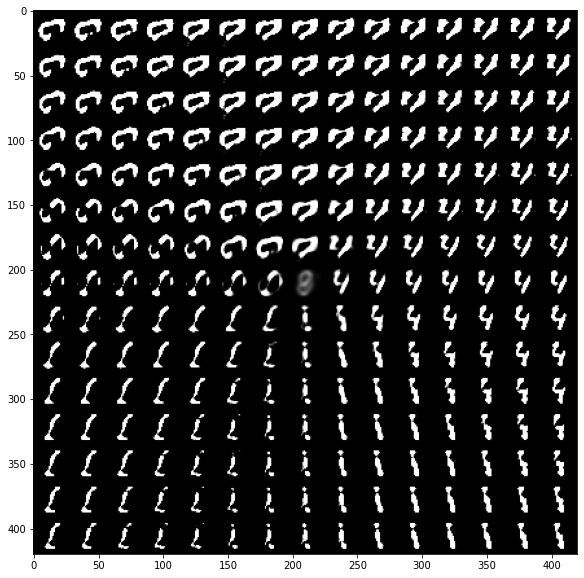

In [ ]:
# Génération de nouveaux individus
n = 15  # figure with 15x15 generated images
figure = np.zeros((nb_pixel * n, nb_pixel * n))

# We sample n images within [-15, 15] standard deviations, around 0 mean
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        
        z_sample = 
        x_decoded =

        digit = x_decoded[0].reshape(nb_pixel, nb_pixel)
        figure[i * nb_pixel: (i + 1) * nb_pixel,
               j * nb_pixel: (j + 1) * nb_pixel] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap="gray")
plt.show()

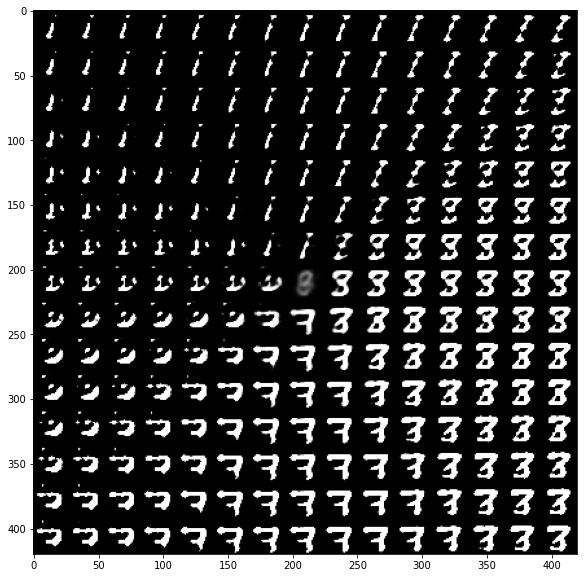

In [12]:
######## CORRECTION #########

# Génération de nouveaux individus
n = 15  # figure with 15x15 generated images
figure = np.zeros((nb_pixel * n, nb_pixel * n))

# We sample n images within [-15, 15] standard deviations, around 0 mean
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        
        # We sample the latent space over the 2 last neurons for example.
        z_sample = np.zeros((1, dim_z))
        z_sample[0,-2] = xi
        z_sample[0,-1] = yi
        x_decoded = decoder.predict(z_sample)

        digit = x_decoded[0].reshape(nb_pixel, nb_pixel)
        figure[i * nb_pixel: (i + 1) * nb_pixel,
               j * nb_pixel: (j + 1) * nb_pixel] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap="gray")
plt.show()

### B. Implémentation par soi-même

Jusqu'à présent, l'implémentation faite suivait le cours. Nous avons principalement utilisé Keras comme encoder et decoder. Qu'en est-il si nous créons nous-mêmes notre propre VAE ?

Tout d'abord quelques imports.

In [13]:
import torch
from torch.autograd import Variable
import numpy as np
from torch.nn.functional import relu
import torchvision
from torchvision import transforms
import torch.optim as optim
from torch import nn
import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = np.array([x.flatten() for x in X_train]).astype("float32") / 255.
X_test = np.array([x.flatten() for x in X_test]).astype("float32") / 255.

nb_train = X_train[:, 0].size
nb_test = X_test[:, 0].size
dim_x = X_train[0].size
dim_hidden_encoder = 100
dim_y = 100
dim_z = 8
dim_hidden_decoder = 100

nb_epoch = 30
batch_size = 32   

On définit notre premier objet qui représente le vecteur avec toutes les moyennes et tous les écarts-types du modèle.

In [15]:
class Normal(object):
    def __init__(self, mu, sigma, log_sigma, v=None, r=None):
        self.mu = mu
        self.sigma = sigma  # either stdev diagonal itself, or stdev diagonal from decomposition
        self.logsigma = log_sigma
        dim = mu.get_shape()
        if v is None:
            v = torch.FloatTensor(*dim)
        if r is None:
            r = torch.FloatTensor(*dim)
        self.v = v
        self.r = r

A présent, il est temps de faire l'encoder.

**Exercice :** A l'aide des méthodes torch.nn.Linear et torch.nn.functional.relu, créer un encoder avec une couche cachée de dimension dim_hidden, et défini avec deux passages y = Wx + b

In [ ]:
class Encoder(torch.nn.Module):
    def __init__(self, dim_in, dim_hidden, dim_out):
        super(Encoder, self).__init__()
        

    def forward(self, x):
        x = 
        return 

In [16]:
######## CORRECTION #########

class Encoder(torch.nn.Module):
    def __init__(self, dim_in, dim_hidden, dim_out):
        super(Encoder, self).__init__()
        # Il y a en tout deux passages de type y = Wx + b dans cet encoder
        self.linear1 = torch.nn.Linear(dim_in, dim_hidden)
        self.linear2 = torch.nn.Linear(dim_hidden, dim_out)

    def forward(self, x):
        # On garde uniquement les valeurs positives
        x = relu(self.linear1(x))
        return relu(self.linear2(x))

On définit ensuite le Decoder. 

**Exercice :** faire de même avec le decoder


In [ ]:
class Decoder(torch.nn.Module):
    def __init__(self, dim_in, dim_hidden, dim_out):


    def forward(self, x):


In [18]:
######## CORRECTION #########

class Decoder(torch.nn.Module):
    def __init__(self, dim_in, dim_hidden, dim_out):
        super(Decoder, self).__init__()
        self.linear1 = torch.nn.Linear(dim_in, dim_hidden)
        self.linear2 = torch.nn.Linear(dim_hidden, dim_out)

    def forward(self, x):
        x = relu(self.linear1(x))
        return relu(self.linear2(x))

Maintenant que notre encoder et notre decoder sont prêts, on va les fusionner dans un VAE. On doit encore ajouter une couche cachée à ce moment qui permet de faire le passage de la loi normale centrée réduite à la loi de moyenne et écart-type définis par le VAE.

**Exercice 1 :** ajouter une couche avec une relation de type y = Wx + b à l'autoencoder, entre l'encoder et le decoder. On pourra noter y la sortie de l'encoder et z l'entrée du decoder.

**Exercice 2 :** définir le passage de la loi normale centrée réduite à la loi de moyenne et d'écart-type définis par le VAE.

**Exercice 3 :** Définir la méthode forward de l'ensemble du VAE.

In [ ]:
class VAE(torch.nn.Module):

    def __init__(self, encoder, decoder):
        super(VAE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder


    def _sample_latent(self, h_enc):
        """
        Return the latent normal sample z ~ N(mu, sigma^2)
        """
        mu = self._enc_mu(h_enc)
        log_sigma = self._enc_log_sigma(h_enc)
        sigma = torch.exp(log_sigma)

        self.z_mean = mu
        self.z_sigma = sigma

        return 

    def forward(self, state):
        return 

In [20]:
######## CORRECTION #########

class VAE(torch.nn.Module):

    def __init__(self, encoder, decoder):
        super(VAE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self._enc_mu = torch.nn.Linear(dim_y, dim_z)
        self._enc_log_sigma = torch.nn.Linear(dim_y, dim_z)

    def _sample_latent(self, h_enc):
      
        mu = self._enc_mu(h_enc)
        log_sigma = self._enc_log_sigma(h_enc)
        sigma = torch.exp(log_sigma)
        z_normal = torch.from_numpy(np.random.normal(0, 1, size=sigma.size())).float()

        self.z_mean = mu
        self.z_sigma = sigma

        return mu + sigma * Variable(z_normal, requires_grad=False)  # Reparameterization trick

    def forward(self, state):
        h_enc = self.encoder(state)
        z = self._sample_latent(h_enc)
        return self.decoder(z)

**Exercice :** on définit ensuite la KL_loss.

In [ ]:
def KL_loss(z_mean, z_std):
    return

In [21]:
######## CORRECTION #########

def KL_loss(z_mean, z_std):
    z_mean2 = z_mean * z_mean
    return 0.5 * torch.mean(z_mean2 + z_std - torch.log(z_std) -1)

Tout est prêt ! On peut lancer le train du modèle !

In [24]:
transform = transforms.Compose([transforms.ToTensor()])
mnist = torchvision.datasets.MNIST('./', download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(mnist, batch_size=batch_size,
                                             shuffle=True, num_workers=2)

encoder = Encoder(dim_x, dim_hidden_encoder, dim_y)
decoder = Decoder(dim_z, dim_hidden_decoder, dim_x)
vae = VAE(encoder, decoder)
mse_loss = nn.MSELoss()
optimizer = optim.Adam(vae.parameters(), lr=0.0001)
  
for epoch in range(nb_epoch):
    for i, data in enumerate(dataloader, 0):
        inputs, classes = data
        inputs, classes = Variable(inputs.resize_(batch_size, dim_x)), Variable(classes)
        optimizer.zero_grad()
        output = vae(inputs)
        kl_loss = KL_loss(vae.z_mean, vae.z_sigma)
        loss = mse_loss(output, inputs) * dim_x + kl_loss
        
        loss.backward()
        optimizer.step()
        
    print(epoch, loss.data.item())

0 27.367023468017578
1 29.14751625061035
2 27.79826545715332
3 23.585344314575195
4 21.622339248657227
5 20.011409759521484
6 23.11690330505371
7 21.4825439453125
8 21.250314712524414
9 20.163442611694336
10 21.05750274658203
11 22.310081481933594
12 22.95500946044922
13 18.791118621826172
14 19.995325088500977
15 19.077695846557617
16 22.055986404418945
17 19.4234676361084
18 22.319278717041016
19 22.583072662353516
20 18.787017822265625
21 20.965274810791016
22 16.735004425048828
23 22.082836151123047
24 18.419803619384766
25 20.8718318939209
26 21.680761337280273
27 20.006088256835938
28 23.57302474975586
29 18.0483341217041


On peut remarquer que le modèle met plus de temps à s'entrainer, même si le nombre de sample est toujours de 60000 et les couches intermédiaires du VAE sont globalement les mêmes. C'est plutôt attendu puisque notre modèle n'est pas optimisé. Les résultats devraient cependant se ressembler.

Il est à noter que pour cette VAE, on a utilisé comme loss la MSE additionnée à la KL divergence. Dans le cours, on a utilisé une fonction de keras (la binary cross-entropy) additionnée à la même KL divergence. On pourrait relancer les simulations en utilisant la même loss ou alors en changeant le poids associé à la KL divergence par rapport à la MSE loss. 

**Exercice :** on peut plot les résultats obtenus avec notre VAE.

tensor([ 0.0463, -1.6644, -1.8344,  0.4205, -0.0222,  0.2995, -2.3677,  0.3901],
       grad_fn=<AddBackward0>)
<built-in method type of Tensor object at 0x7fe9302263a8>
tensor([ 1.9274, -0.1797,  0.9489,  0.5347,  1.1310, -1.2093, -1.3026,  0.6188],
       grad_fn=<AddBackward0>)
<built-in method type of Tensor object at 0x7fe92ffe2990>
tensor([-1.8340, -1.0939, -0.5320, -0.7593,  0.6484,  0.0253, -1.6754,  0.7302],
       grad_fn=<AddBackward0>)
<built-in method type of Tensor object at 0x7fe93123dfc0>
tensor([ 0.8250,  1.1540, -1.8092,  0.7245,  1.8948,  1.8794,  0.9675, -0.1641],
       grad_fn=<AddBackward0>)
<built-in method type of Tensor object at 0x7fe9300da438>
tensor([ 0.2492, -0.3241,  1.5721, -0.0376,  1.4571, -1.6169, -0.6885, -0.0758],
       grad_fn=<AddBackward0>)
<built-in method type of Tensor object at 0x7fe92ffc3b40>
tensor([-1.2716,  1.7997,  0.7990,  0.8535, -2.3273, -1.2402, -0.0485, -2.4089],
       grad_fn=<AddBackward0>)
<built-in method type of Tensor object

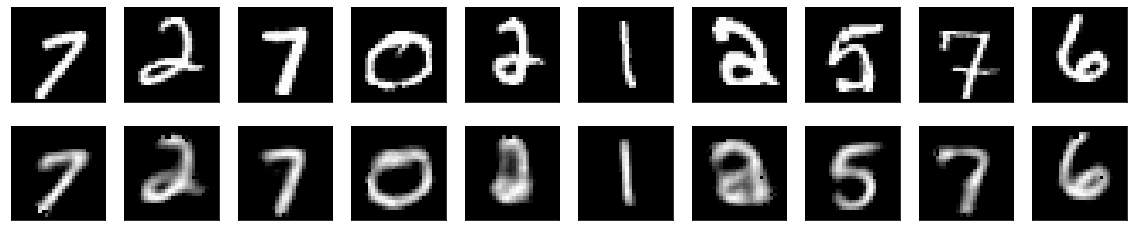

In [ ]:
n = 10
plt.figure(figsize=(2*n, 4))

for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    encoded_img = 
    decoded_img = 
    plt.imshow(
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

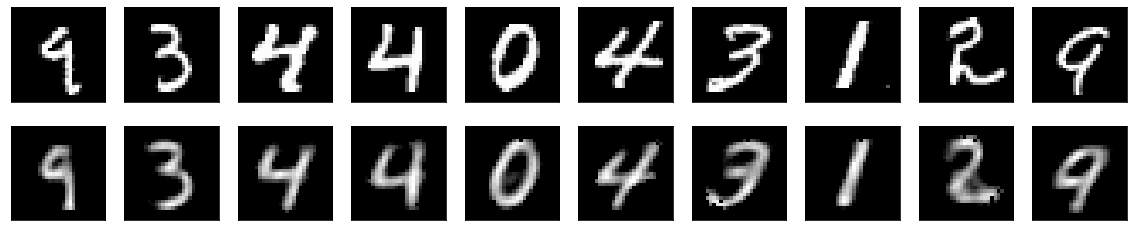

In [25]:
######## CORRECTION #########

n = 10
plt.figure(figsize=(2*n, 4))

for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(inputs.data[i].reshape(nb_pixel, nb_pixel), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    encoded_img = vae._sample_latent(vae.encoder(inputs.data[i]))
    decoded_img = vae.decoder(encoded_img).data.numpy().reshape(nb_pixel, nb_pixel)
    plt.imshow(decoded_img, cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Les résultats sont globalement très satisfaisants et ressemblent énormément à ce qu'on a obtenu plus haut ! On peut cependant remarquer la présence de pixels noirs en plein milieu des chiffres. La compression des données est peut-être un peu trop importante !

Voyons à présent la génération de nouveaux individus :

**Exercice :** compléter le code pour créer de nouveaux individus comme précédemment

In [ ]:
# Génération de nouveaux individus
n = 15  # figure with 15x15 generated images
figure = np.zeros((nb_pixel * n, nb_pixel * n))

# We sample n images within [-15, 15] standard deviations, around 0 mean
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
      
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap="gray")
plt.show()

IndentationError: ignored

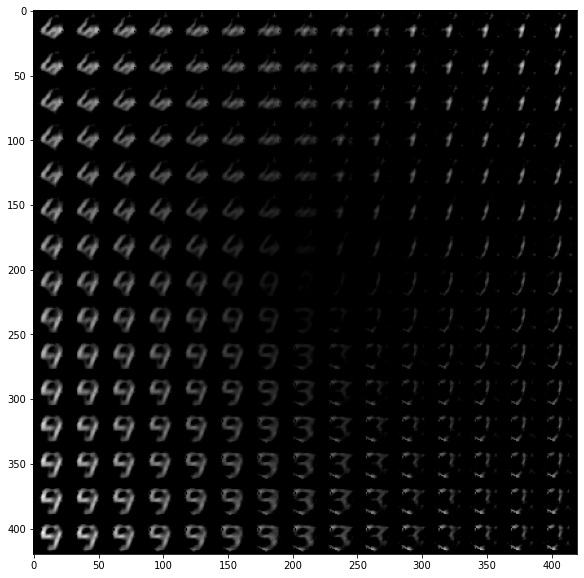

In [26]:
######## CORRECTION #########

# Génération de nouveaux individus
n = 15  # figure with 15x15 generated images
figure = np.zeros((nb_pixel * n, nb_pixel * n))

# We sample n images within [-15, 15] standard deviations, around 0 mean
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        
        # We sample the latent space over the 2 last neurons for example
        z_sample = np.zeros((1, dim_z))
        z_sample[0,-2] = xi
        z_sample[0,-1] = yi
        z_sample = torch.from_numpy(z_sample.astype("f"))
        x_decoded = vae.decoder(z_sample)

        digit = x_decoded.data[0].reshape(nb_pixel, nb_pixel)
        figure[i * nb_pixel: (i + 1) * nb_pixel,
               j * nb_pixel: (j + 1) * nb_pixel] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap="gray")
plt.show()

### C. Pour aller plus loin

Pour aller plus loin dans la définition et création d'un variational autoencoder, voici des liens vers des github qui sont beaucoup plus complets :
- https://github.com/kvfrans/variational-autoencoder
- https://github.com/psanch21/VAE-GMVAE

## Conclusion

Un VAE est bien différent d'un autoencoder classique. Là où ces derniers cherchent principalement à rendre l'information telle qu'elle était au départ, le VAE veut, lui, pouvoir générer de nouveaux individus. Il a donc une structure plus adaptée avec, au lieu d'une assigniation de valeurs, une assigniation d'une distribution de probabilité. 

Les VAE peuvent être utilisés pour générer des images ([VQ-VAE](https://arxiv.org/abs/1906.00446v1)), mais aussi des textes ([Optimus](https://arxiv.org/abs/2004.04092)). Ils sont donc très versatiles.

Le désavantage des VAE est que l'information en sortie reste de moins bonne qualité que celle d'un autoencoder classique. De plus, il nécessite de garder en mémoire plus d'information qu'un autoencoder classique (au moins deux variables donnant par exmple la moyenne et l'écart-type de la distribution, contre une seule pour un autoencoder classique).


